In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-crop-images/Crop_details.csv
/kaggle/input/agriculture-crop-images/test_crop_image/maize000.jfif
/kaggle/input/agriculture-crop-images/test_crop_image/rice-5174887_1280.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/juteplants.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/maize images.jfif
/kaggle/input/agriculture-crop-images/test_crop_image/sugarcaneplant.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/maize corn set2.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/wheat-field-artificial-irrigation-rural-electrification-to-harvest-166395991.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/juteimg.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/wheatcropfield04.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/rice-4967164_1280.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/rice-fields-204128_1280.jpg
/kaggle/input/agriculture-crop-images/test_crop_image/jute002.jpg
/kaggle/input

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
import cv2

In [3]:
df = pd.read_csv("../input/agriculture-crop-images/Crop_details.csv")
df.head()

,Unnamed: 0,path,crop,croplabel
0,0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3
3,3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg,sugarcane,3
4,4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg,sugarcane,3


In [4]:
categories = os.listdir("../input/agriculture-crop-images/kag2")
categories

['jute', 'maize', 'wheat', 'sugarcane', 'rice']

In [5]:
getData = ImageDataGenerator(rescale=1/255,
                             shear_range=0.3,
                             horizontal_flip=True,
                            vertical_flip= True,
                            rotation_range=90)

In [6]:
kag2_data = getData.flow_from_directory("../input/agriculture-crop-images/kag2",
                                       target_size=(224,224),
                                       class_mode='categorical',
                                       shuffle = True,
                                       batch_size=32)

Found 804 images belonging to 5 classes.


In [7]:
vgg_model = VGG16(input_shape = (224,224,3),
                  include_top=False,
                  weights='imagenet',
                  pooling='avg')
for layers in vgg_model.layers:
    layers.trainable = False


2022-09-01 17:16:14.322498: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58900480/58889256 [==============================] - 2s 0us/step


In [8]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 15,043,653
Trainable params: 328,965
Non-trainable params: 14,714,688
______________________________________

In [11]:
num_trian_samples = 804
batch_size = 64
epochs = 50

final_model = model.fit_generator(kag2_data,
                                 steps_per_epoch=num_trian_samples//batch_size,
                                 epochs=epochs)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-01 17:16:18.713584: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
12/12 [==============================] - 91s 7s/step - loss: 1.7161 - accuracy: 0.2344
Epoch 2/50
12/12 [==============================] - 88s 7s/step - loss: 1.5660 - accuracy: 0.2786
Epoch 3/50
12/12 [==============================] - 87s 7s/step - loss: 1.4874 - accuracy: 0.3516
Epoch 4/50
12/12 [==============================] - 88s 7s/step - loss: 1.4342 - accuracy: 0.3750
Epoch 5/50
12/12 [==============================] - 88s 7s/step - loss: 1.3599 - accuracy: 0.4167
Epoch 6/50
12/12 [==============================] - 83s 7s/step - loss: 1.4118 - accuracy: 0.3652
Epoch 7/50
12/12 [==============================] - 82s 7s/step - loss: 1.3318 - accuracy: 0.4410
Epoch 8/50
12/12 [==============================] - 89s 7s/step - loss: 1.2839 - accuracy: 0.4349
Epoch 9/50
12/12 [==============================] - 88s 7s/step - loss: 1.2375 - accuracy: 0.4870
Epoch 10/50
12/12 [==============================] - 88s 7s/step - loss: 1.1807 - accuracy: 0.4948
Epoch 11/50
12/12 [

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255)
crop_data = test_datagen.flow_from_directory("../input/agriculture-crop-images/crop_images",
                                       target_size=(224,224),
                                       class_mode='categorical',
                                       shuffle = True,
                                       batch_size=32)

Found 201 images belonging to 5 classes.


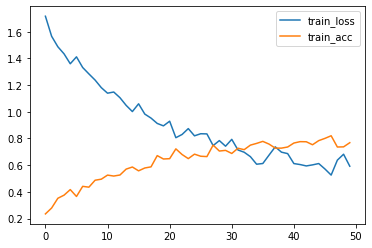

In [13]:
plt.plot(final_model.history['loss'],label='train_loss')
plt.plot(final_model.history['accuracy'],label='train_acc')
plt.legend()
plt.show()

In [14]:
class_labels = crop_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
Y_pred = model.predict_generator(crop_data)
y_pred = np.argmax(Y_pred, axis=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [15]:
def predict_crop(path,actual,class_labels):
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    img = np.array(img).reshape((1,224,224,3))
    Y_pred = model.predict(img)
    y_pred = np.argmax(Y_pred,axis=1)
    if y_pred == actual:
        print("Correct Prediction 🎉🎊🎉")
    else:
        print("Wrong Prediction 💥💥💥")
    print('Actual class "{0}" and predicted class "{1}"'.format(class_labels[int(y_pred)],class_labels[actual]))

In [16]:
predict_crop('/kaggle/input/agriculture-crop-images/kag2/rice/rice024ahs.jpeg',2,class_labels)


Wrong Prediction 💥💥💥
Actual class "maize" and predicted class "rice"


In [17]:
predict_crop('../input/agriculture-crop-images/test_crop_image/sugarcane fields.jpg',3,class_labels)


Wrong Prediction 💥💥💥
Actual class "maize" and predicted class "sugarcane"
